In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns
sns.set()

In [169]:
%matplotlib inline

In [170]:
data=pd.read_csv('D:\download files\Spotify.csv')

In [171]:
data.head(5)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [173]:
data.isnull().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [174]:
data.isna().sum().T

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [175]:
data['year'].unique()

array([2000, 1999, 2001, 2011, 2002, 2016, 1998, 2018, 2004, 2010, 2015,
       2006, 2008, 2019, 2003, 2013, 2005, 2012, 2020, 2007, 2009, 2017,
       2014], dtype=int64)

In [176]:
s=data[(data['year']==1998)|(data['year']==1999)|(data['year']==2020)]['song'].count()
print("Total number of songs in 2020,1999,1998:",s)

Total number of songs in 2020,1999,1998: 42


In [177]:
df_drop_year = data[(data['year']<2000) | (data['year']>2019)].index
data = data.drop(df_drop_year)
##removing rows and columns of above condition

 **.Goal of the dataset is top analyse data between time period[2000-2019]**

In [178]:
print(data.shape)

(1958, 18)


In [179]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
duration_ms,1958.0,228294.167518,39006.575187,113000.000000,203422.75000,223059.50000,247376.250000,484146.000
year,1958.0,2009.687436,5.715210,2000.000000,2005.00000,2010.00000,2015.000000,2019.000
popularity,1958.0,59.805414,21.511567,0.000000,56.00000,66.00000,73.000000,89.000
danceability,1958.0,0.667258,0.140353,0.129000,0.58100,0.67600,0.763750,0.975
energy,1958.0,0.720057,0.152390,0.054900,0.62400,0.73600,0.837000,0.999
key,1958.0,5.387640,3.610776,0.000000,2.00000,6.00000,8.000000,11.000
loudness,1958.0,-5.502172,1.925689,-20.514000,-6.48100,-5.27950,-4.166250,-0.276
mode,1958.0,0.554137,0.497188,0.000000,0.00000,1.00000,1.000000,1.000
speechiness,1958.0,0.104174,0.096524,0.023200,0.03970,0.06085,0.131000,0.576
acousticness,1958.0,0.128534,0.173719,0.000019,0.01400,0.05530,0.176000,0.976


In [180]:
data.dtypes.value_counts()

float64    9
int64      5
object     3
bool       1
dtype: int64

## Univariate Analyse

In [181]:
dtype=(data.dtypes=='object')
CV=list(dtype[dtype].index)
print("Catogorial Variable:",CV)

Catogorial Variable: ['artist', 'song', 'genre']


In [182]:
artist=data['artist'].value_counts()
artist.head(10)

Rihanna           25
Drake             23
Eminem            21
Calvin Harris     20
David Guetta      18
Britney Spears    18
Kanye West        17
Chris Brown       17
Katy Perry        16
Beyoncé           16
Name: artist, dtype: int64

D:\AnaConda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Top 5 Artist with hit songs')

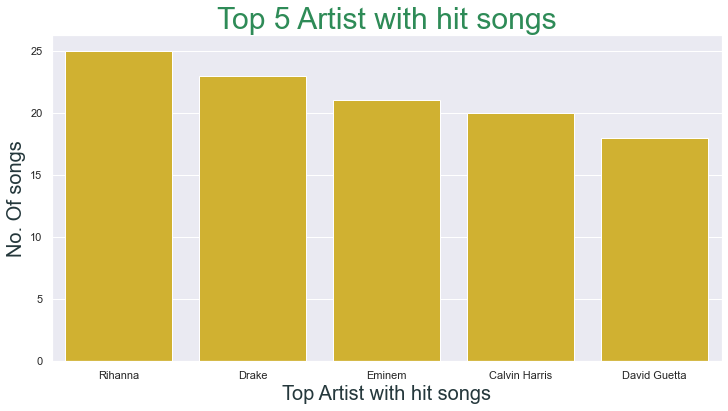

In [183]:
plt.figure(figsize=(12,6))
tp_artist=artist.head(5)
tp_artist_name=artist.index[:5]
sns.barplot(tp_artist_name,tp_artist,errwidth=0.5,color='#EAC117')
plt.xlabel('Top Artist with hit songs',fontsize=20,color='#25383C')
plt.ylabel('No. Of songs',fontsize=20,color='#25383C')
plt.title('Top 5 Artist with hit songs', fontsize=30,color='seagreen')

**1.Rihanna seems to be the most popular artist with 25 songs of her to be listed as the top-hit in that particular year.**

**2.Immediately followed by Drake who has 23 songs which has been declared as the top-hit over the past 19yrs (2000-2019)**

In [184]:
data.head(5)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.0302,0.000000,0.0454,0.760,104.504,hip hop
7,Robbie Williams,Rock DJ,258560,False,2000,68,0.708,0.772,7,-4.264,1,0.0322,0.0267,0.000000,0.4670,0.861,103.035,"pop, rock"


#### Genre

In [185]:
Genre=data['genre'].value_counts()
Genre

pop                                      416
hip hop, pop                             275
hip hop, pop, R&B                        240
pop, Dance/Electronic                    219
pop, R&B                                 173
hip hop                                  121
hip hop, pop, Dance/Electronic            78
rock                                      57
rock, pop                                 41
Dance/Electronic                          40
rock, metal                               37
pop, rock                                 26
pop, latin                                26
set()                                     21
hip hop, Dance/Electronic                 16
latin                                     15
hip hop, pop, latin                       14
R&B                                       13
pop, rock, Dance/Electronic               13
pop, rock, metal                          12
country                                   10
hip hop, pop, rock                         9
metal     

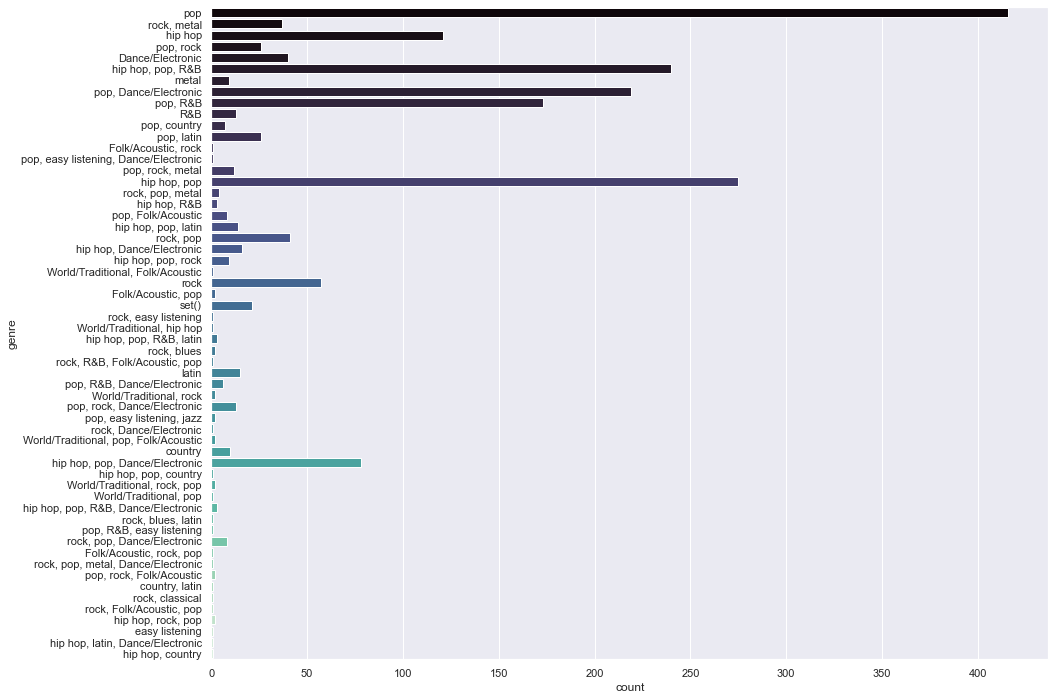

In [186]:
genre2=plt.figure(figsize=(15,12))
sns.countplot(y='genre',data=data,palette='mako')
plt.show()

Text(0.5, 1.0, 'Top 5 Genres or Combination of Genres which are hits')

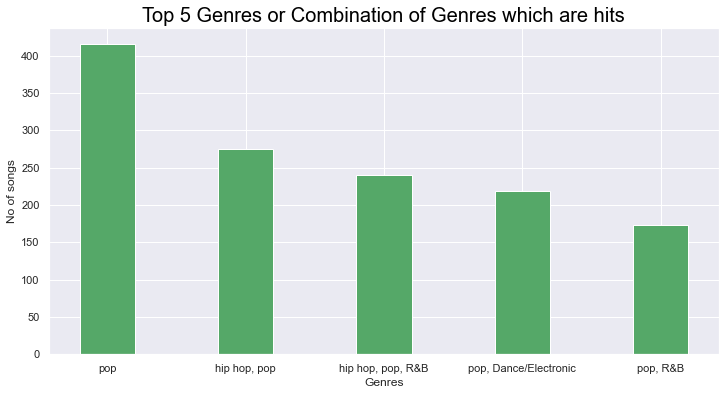

In [187]:
plt.figure(figsize=(12,6))
tp_genre=Genre[:5]
tp_genre_name=Genre[:5].index
plt.bar(tp_genre_name,tp_genre,width=0.4,color='g')
plt.xlabel("Genres")
plt.ylabel("No of songs")
plt.title('Top 5 Genres or Combination of Genres which are hits',color = 'black',fontsize = 20)

#### .Pop seems to be the most popular type of genre.
#### .428 songs of the top-hits spotify songs since 2000-2019 belong to pop
#### .This is followed by hip-hop,pop which is the 2nd most popular combination of genre

## Numerical Varible in the dataset

In [188]:
dtype=(data.dtypes!='object')
nv=list(dtype[dtype].index)
print("\nCatogorial Variable:")
print(nv)


Catogorial Variable:
['duration_ms', 'explicit', 'year', 'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']


###### changing millisecond to mins & forming new column 

In [189]:
def time_convert(ms):
    sec=ms/1000
    return f"{int(sec//60)}:{int(sec%60)}"
durations = data[['duration_ms','year']].groupby('year').mean().reset_index().iloc[0:20]
durations['min:sec'] = durations['duration_ms'].apply(time_convert)
d=durations.sort_values(['min:sec'],ascending=False)
d

,year,duration_ms,min:sec
0,2000,249993.067568,4:9
1,2001,242450.064815,4:2
2,2002,253549.077778,4:13
6,2006,238148.400000,3:58
3,2003,236334.639175,3:56
5,2005,236514.288462,3:56
9,2009,236082.059524,3:56
8,2008,235675.247423,3:55
4,2004,234039.843750,3:54
7,2007,231749.904255,3:51


Text(0.5, 1.0, 'Change in duration')

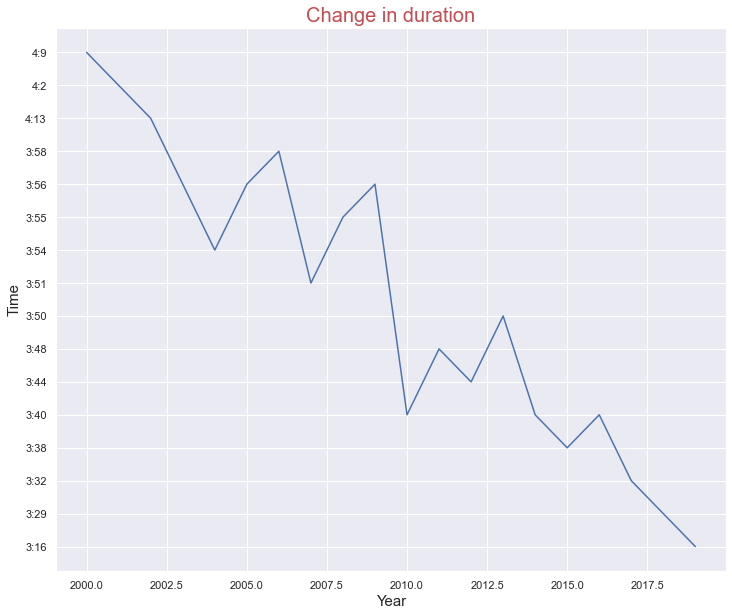

In [190]:
x=data["year"].unique()
x=sorted(x)
y=(d["min:sec"])
x=pd.Series(x)
plt.figure(figsize=(12,10))
sns.lineplot(x='year',y='min:sec',data=d)
plt.xlabel('Year',size=15)
plt.ylabel('Time',size=15)
plt.title('Change in duration',size=20,color='r')

*****.Here we can find the general pattern that as the years pass by the average song duration has been decreasing.*****

In [191]:
data.head(2)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.355,0.894,95.053,pop
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.347,0.544,119.992,"rock, metal"


In [192]:
song_len=data[['artist','song','duration_ms','year']]
dur_max=data['duration_ms'].max()
sl_max=song_len[data['duration_ms']==dur_max].T
print('Longest Song which is hit:',sl_max)
song_len1=data[['artist','song','duration_ms','year']]
dur_min=data['duration_ms'].min()
sl_min=song_len[data['duration_ms']==dur_min].T
print('Shortes Song which is hit:',sl_min)

Longest Song which is hit:                           1381
artist       Justin Timberlake
song                   Mirrors
duration_ms             484146
year                      2013
Shortes Song which is hit:                       1931
artist           Lil Nas X
song         Old Town Road
duration_ms         113000
year                  2019


***1.The longest song to be certifed a top hit is Mirrors by Justin Timberlake from 2013.***

***2.The shortest song to be certified a top hit is Old Town Road by Lil Nas X from 2019.***

***3.The average duration of a top-hit song is 3mins and 48sec.***

##### ******Amount of explicit in top hit song***

In [193]:
exp_song=data['explicit'].value_counts()
exp_song.T

False    1418
True      540
Name: explicit, dtype: int64

Text(0.5, 1.0, 'No. Of Explicit content')

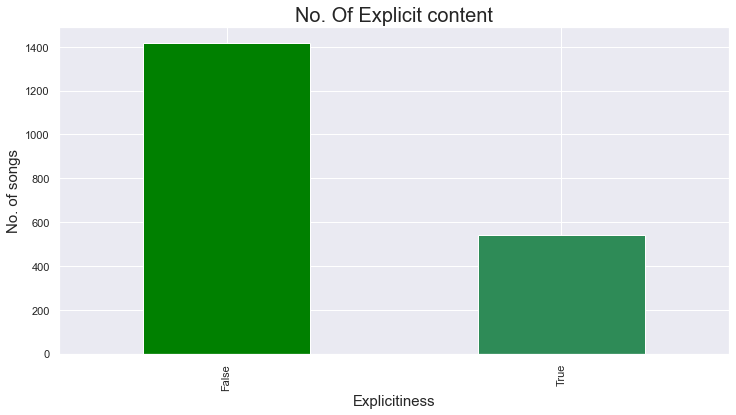

In [194]:
plt.figure(figsize=(12,6))
exp_song.plot(kind='bar',color=['green','seagreen'])
plt.xlabel('Explicitiness',size=15)
plt.ylabel('No. of songs',size=15)
plt.title('No. Of Explicit content',size=20)

###### -Thus we can conclude that most of the top-hits have low explicit lyrics.

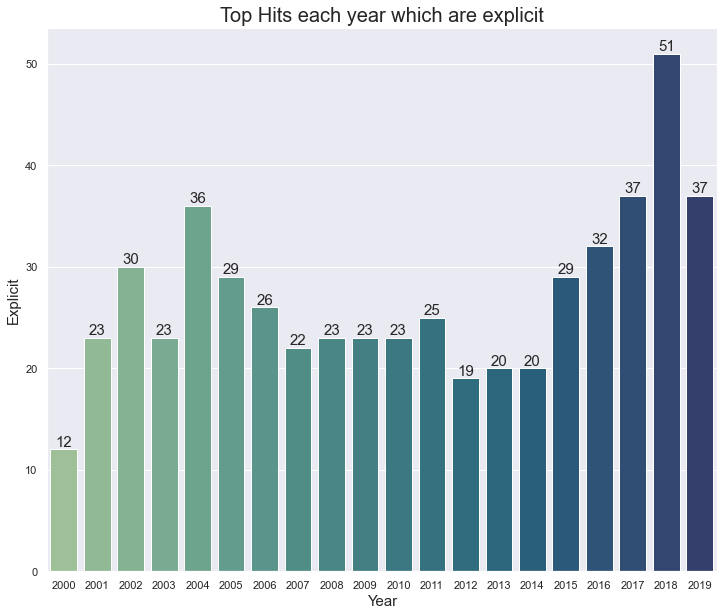

In [195]:
exp_year=data.groupby(['year','explicit']).size().unstack(fill_value=0).reset_index()
exp_year.rename(columns={False:'Clean', True: 'Explicit'}, inplace=True)
plt.figure(figsize=(12,10))
a1=sns.barplot(x='year',y='Explicit',data=exp_year,palette='crest')
plt.title('Top Hits each year which are explicit',size=20)
plt.xlabel('Year',size=15)
plt.ylabel('Explicit',size=15)
a1.bar_label(a1.containers[0],size=15)
plt.show()

###### No. of songs released each year which become top hits

In [196]:
data['year'].value_counts()

2012    115
2017    111
2001    108
2018    107
2010    107
2014    104
2005    104
2011     99
2016     99
2015     99
2003     97
2008     97
2004     96
2006     95
2007     94
2002     90
2019     89
2013     89
2009     84
2000     74
Name: year, dtype: int64

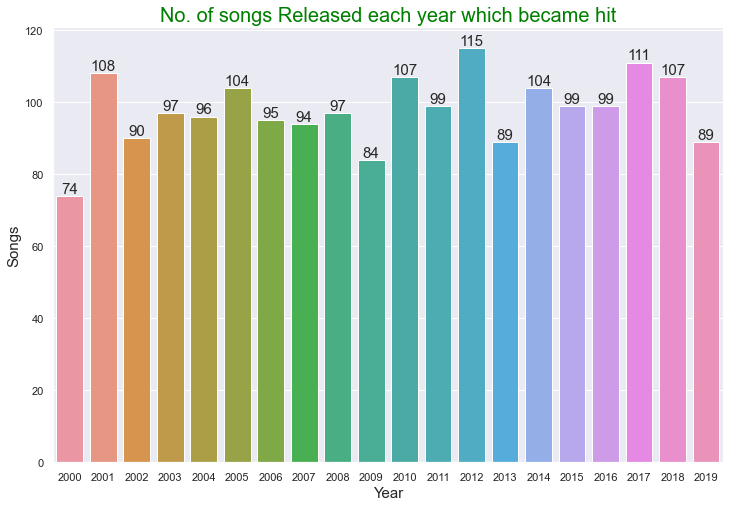

In [197]:
s_each_year1=data['year'].value_counts().rename_axis('year').reset_index(name='songs')
plt.figure(figsize=(12,8))
b1=sns.barplot(x='year',y='songs',data=s_each_year1)
plt.xlabel('Year',size=15)
plt.ylabel('Songs',size=15)
plt.title('No. of songs Released each year which became hit',size=20,color='green')
b1.bar_label(b1.containers[0],size=15)
plt.show()

 **Analying the the top-hits from 1999 to 2019 we can see , 2012 had the maximum number of songs to make it to the top-hits, while the lowest was in 2000**

### >The most popular song to ever become top-hit:

#### The popularity of a song on Spotify is based on the popularity score which ranges from 0-100 , with 100 being the maximum

In [198]:
data.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.0302,0.000000,0.0454,0.760,104.504,hip hop
7,Robbie Williams,Rock DJ,258560,False,2000,68,0.708,0.772,7,-4.264,1,0.0322,0.0267,0.000000,0.4670,0.861,103.035,"pop, rock"


In [199]:
max_pop=data['popularity'].max()
s_max_pop=data[data['popularity']==max_pop]
s_max_pop

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1322,The Neighbourhood,Sweater Weather,240400,False,2013,89,0.612,0.807,10,-2.81,1,0.0336,0.0495,0.0177,0.101,0.398,124.053,"rock, pop"


### The most popular artists:

In [200]:
artist_pop=data[['popularity','artist']].groupby('artist').sum().sort_values('popularity',ascending=False).head(10)
artist_pop

,popularity
artist,
Rihanna,1803
Eminem,1519
Drake,1424
Calvin Harris,1356
David Guetta,1185
Britney Spears,1140
Taylor Swift,1125
Chris Brown,1080
Kanye West,1049


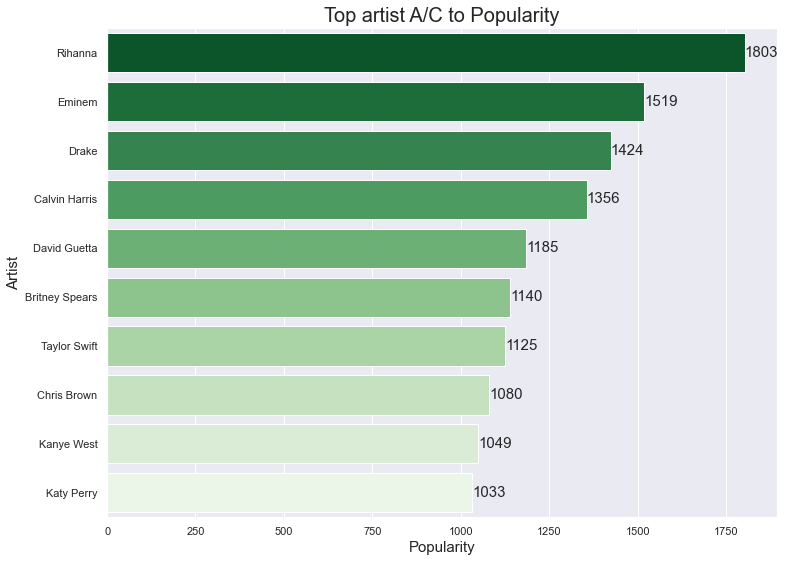

In [201]:
plt.figure(figsize=(12,9))
c1=sns.barplot(x='popularity',y=artist_pop.index,data=artist_pop,palette='Greens_r')
plt.title('Top artist A/C to Popularity',size=20)
plt.xlabel('Popularity',size=15)
plt.ylabel('Artist',size=15)
c1.bar_label(c1.containers[0],size=15)
plt.show()

**** Rihanna seems to be the most popular artist to have been featured in a top hit followed by Eminem.****

### Most deaceable song to be hit list

In [202]:
dance_song_max=data['danceability'].max()
dance_song=data[data['danceability']==dance_song_max]
dance_song

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
714,Timbaland,Give It To Me,234026,True,2007,70,0.975,0.711,8,-3.904,1,0.0632,0.168,0.000552,0.0799,0.815,110.621,"hip hop, pop, R&B"


In [203]:
dance_song_min=data['danceability'].min()
dance_song1=data[data['danceability']==dance_song_min]
dance_song1

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
573,Westlife,You Raise Me Up,241066,False,2005,1,0.129,0.358,10,-6.596,1,0.0314,0.631,0.0,0.0886,0.172,75.048,pop


## To find the relatioship between the features

### Correlation between various features:

In [204]:
##creating new dataframe
df_new = data[['duration_ms', 'year', 'popularity', 'danceability', 'energy', 
     'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
df_new

,duration_ms,year,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,211160,2000,77,0.751,0.834,-5.444,0.0437,0.3000,0.000018,0.3550,0.894,95.053
3,224493,2000,78,0.551,0.913,-4.063,0.0466,0.0263,0.000013,0.3470,0.544,119.992
4,200560,2000,65,0.614,0.928,-4.806,0.0516,0.0408,0.001040,0.0845,0.879,172.656
6,284200,2000,86,0.949,0.661,-4.244,0.0572,0.0302,0.000000,0.0454,0.760,104.504
7,258560,2000,68,0.708,0.772,-4.264,0.0322,0.0267,0.000000,0.4670,0.861,103.035
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,181026,2019,79,0.842,0.734,-5.065,0.0588,0.0427,0.000000,0.1060,0.952,137.958
1996,178426,2019,78,0.552,0.702,-5.707,0.1570,0.1170,0.000021,0.1050,0.564,169.994
1997,200593,2019,69,0.847,0.678,-8.635,0.1090,0.0669,0.000000,0.2740,0.811,97.984
1998,171029,2019,75,0.741,0.520,-7.513,0.0656,0.4500,0.000002,0.2220,0.347,102.998


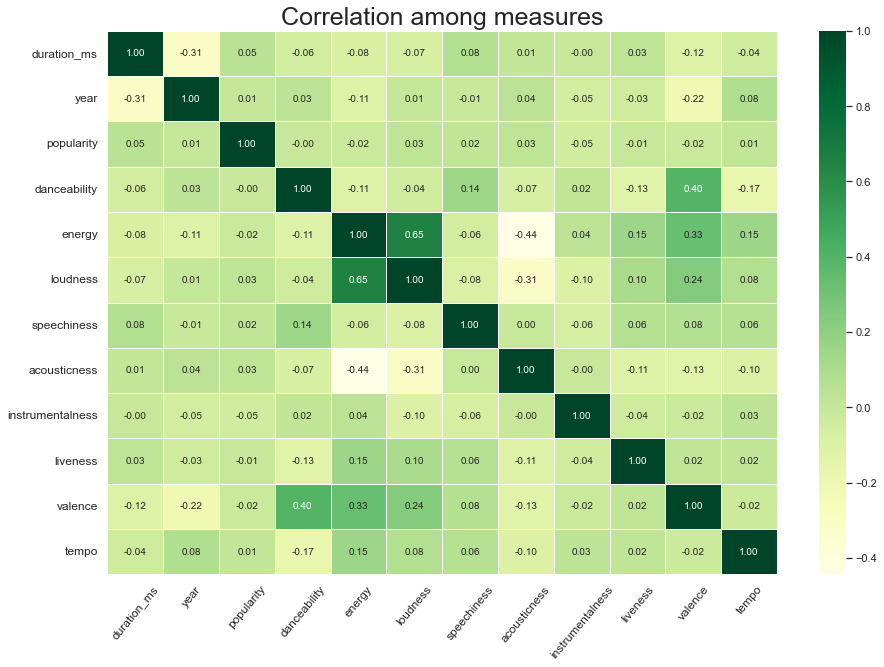

In [205]:
plt.figure(figsize=(15,10))
sns.heatmap(df_new.corr(),annot=True,fmt='.2f',lw=1,cmap = "YlGn")
plt.title('Correlation among measures', size = 25)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation = 50)
plt.show()

**We are able to understand from the above heatmap that there are both positive and negative correlation among features.**

**Higher the energy of the song , louder it is.**

**Songs which have high danceability scores are positively correlated with quite high valence scores.**

<Figure size 720x576 with 0 Axes>

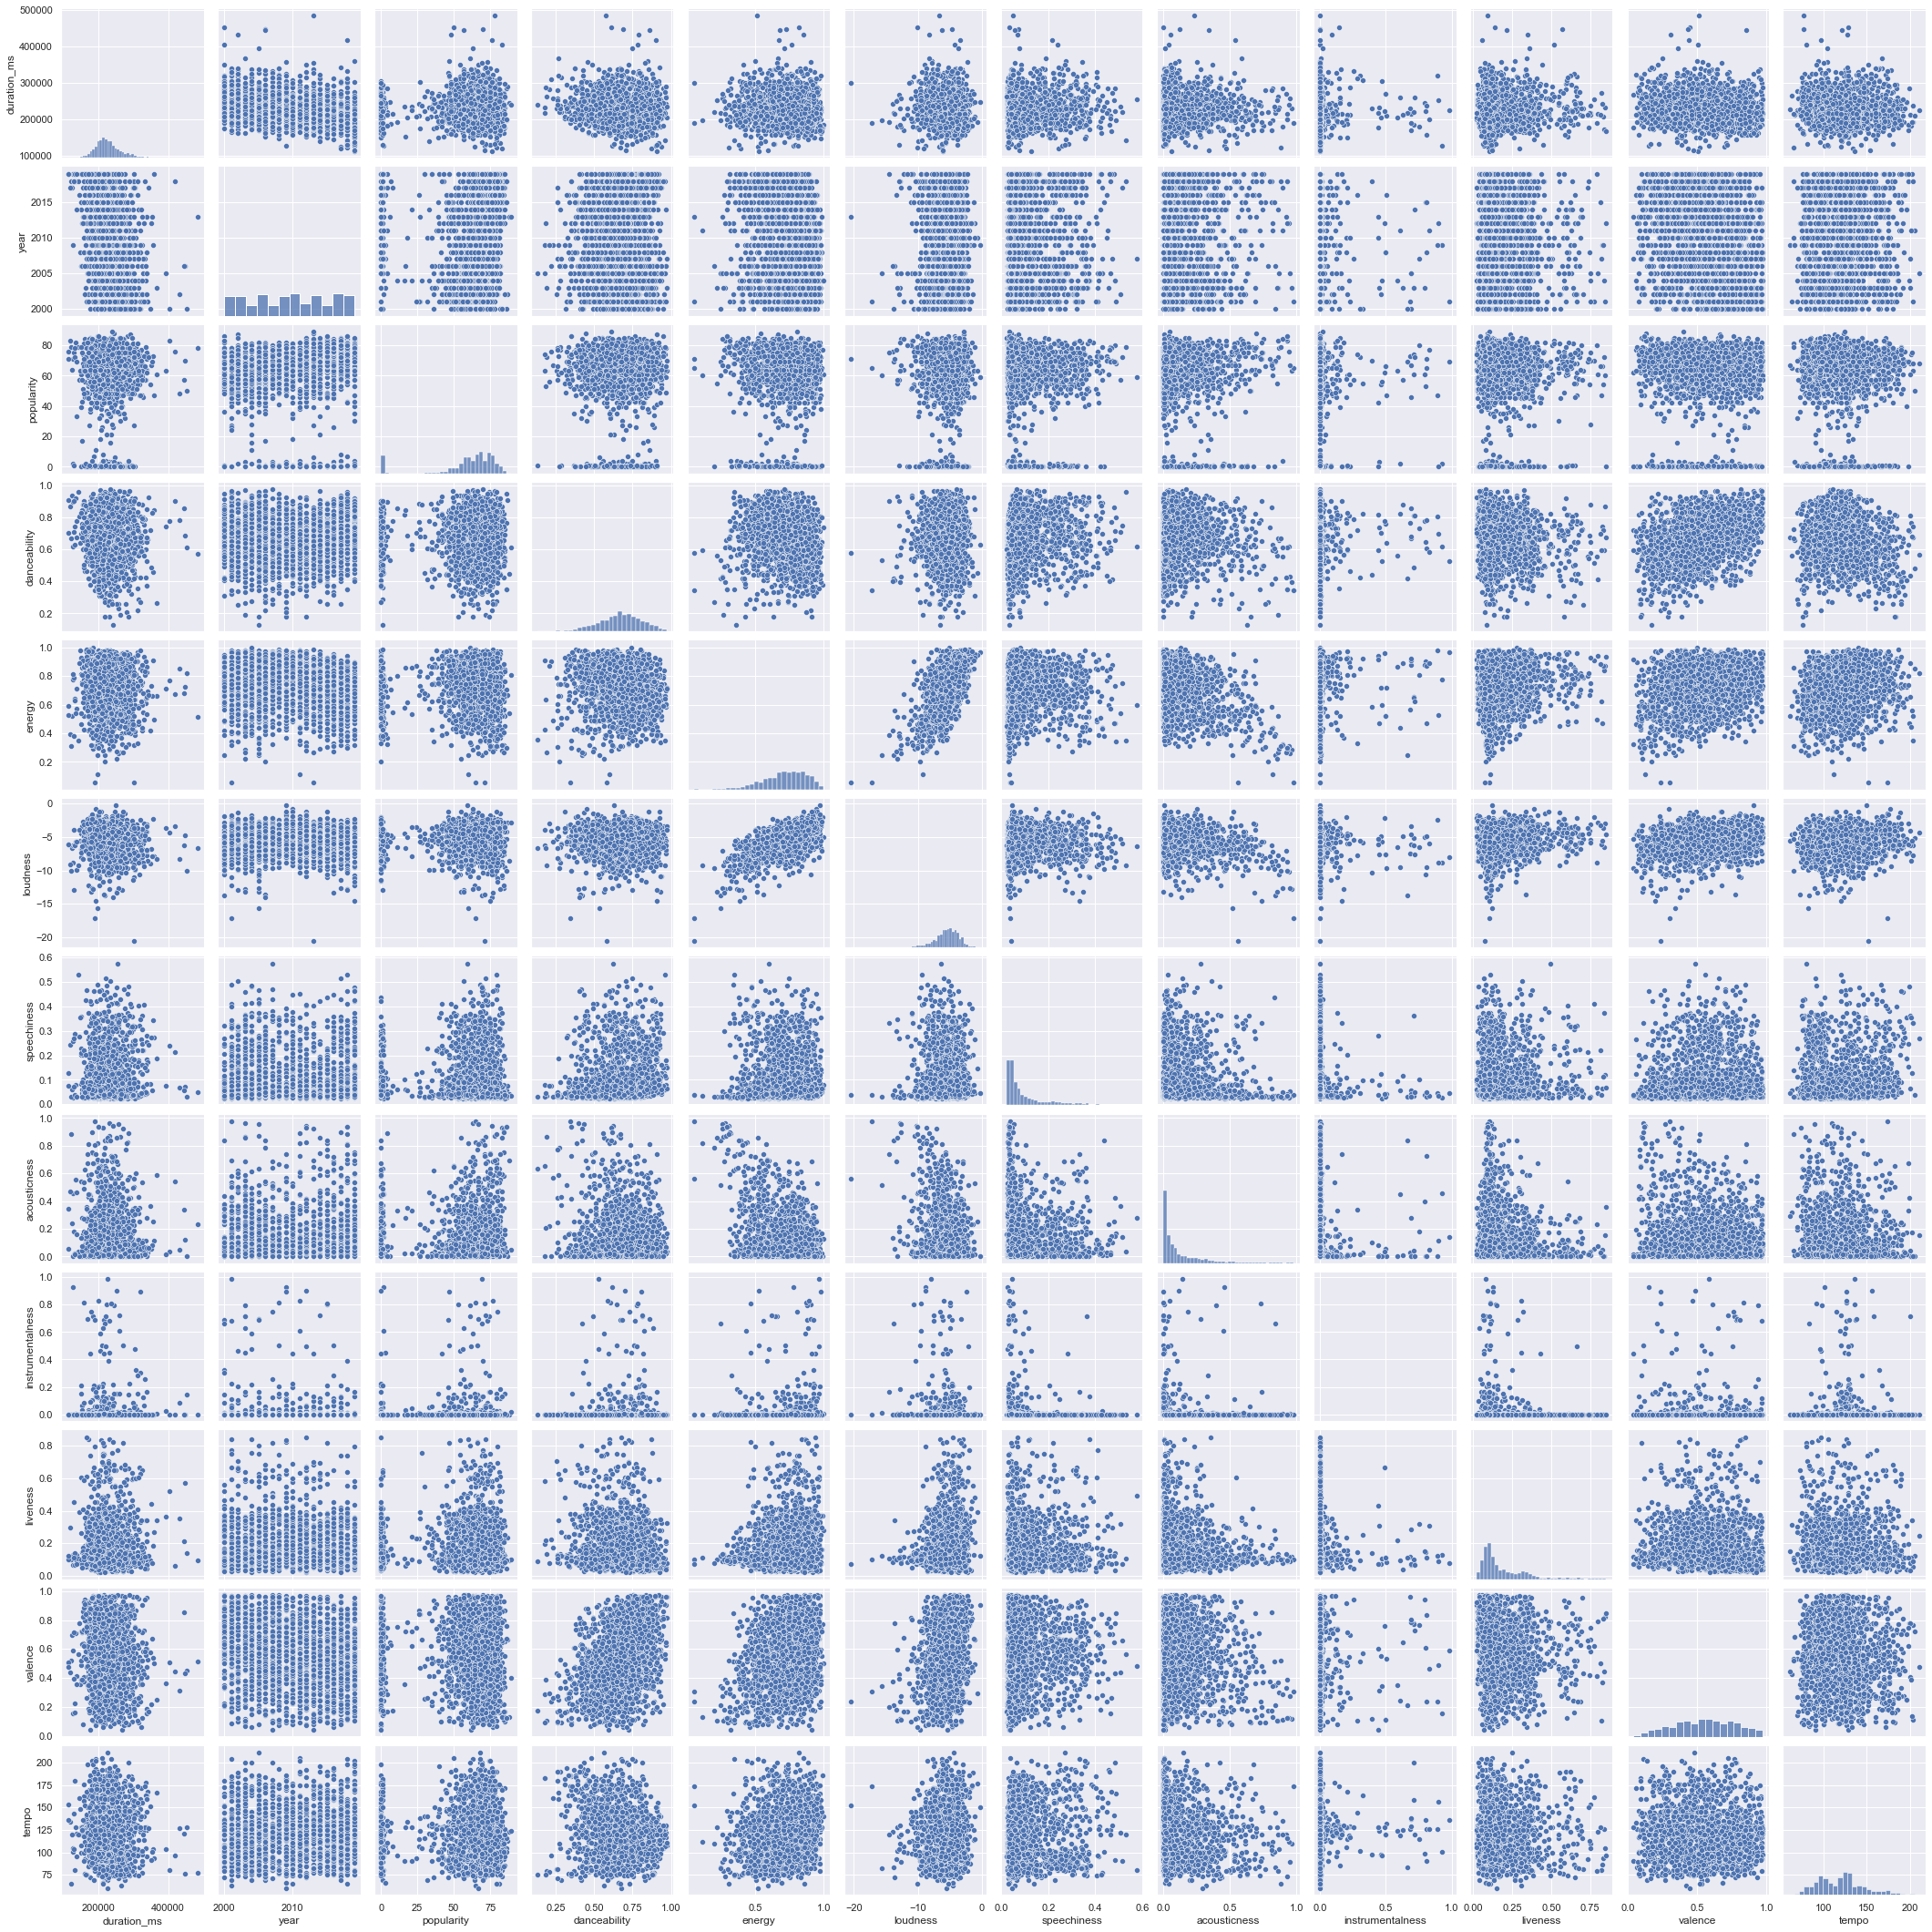

In [206]:
plt.figure(figsize=(10,8))
sns.pairplot(df_new)

#### Distributions of Top-hits on basis of various features from 2000-2019:

##### Popularity:

D:\AnaConda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


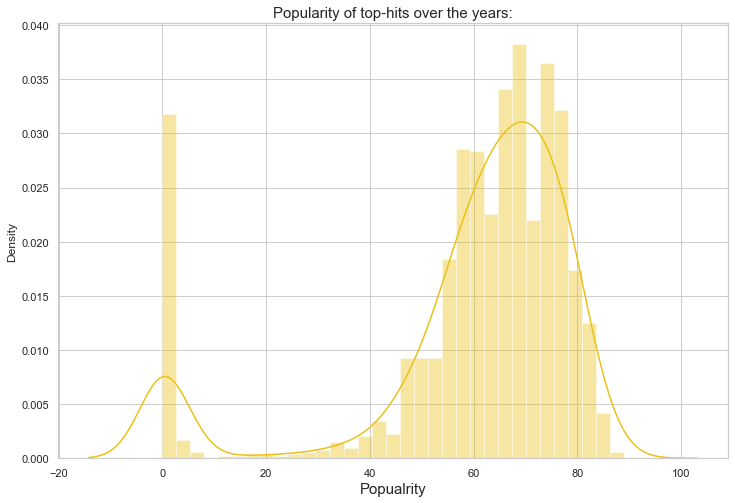

Average popuylarity of hits: 59.80541368743616

Maximum popularity of hits: 89


In [207]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,8))
sns.distplot(df_new['popularity'],color='#EAC117')
plt.xlabel('Popualrity',size=15)
plt.title("Popularity of top-hits over the years:",size=15)
plt.show()
print('Average popuylarity of hits:',df_new['popularity'].mean())
print('\nMaximum popularity of hits:',df_new['popularity'].max())

###### Danceability

D:\AnaConda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


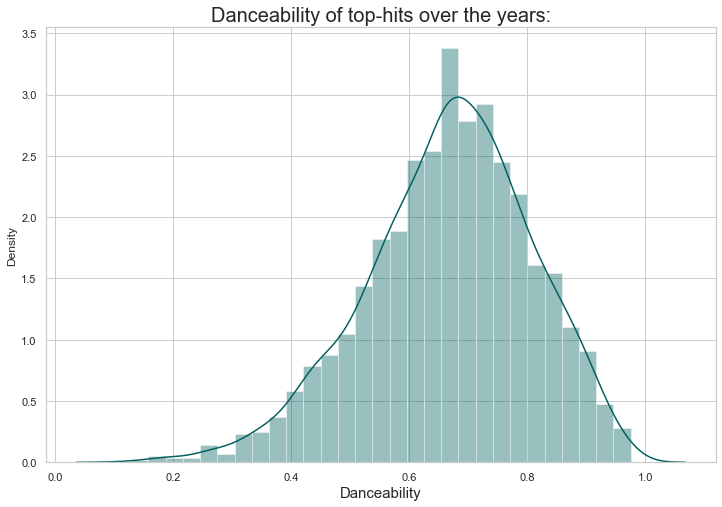

Average danceability of hits: 0.6672579162410623

Maximum danceability of hit:


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
714,Timbaland,Give It To Me,234026,True,2007,70,0.975,0.711,8,-3.904,1,0.0632,0.168,0.000552,0.0799,0.815,110.621,"hip hop, pop, R&B"


In [208]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,8))
sns.distplot(df_new['danceability'],color='#045F5F')
plt.xlabel('Danceability',size=15)
plt.title("Danceability of top-hits over the years:",size=20)
plt.show()
print('Average danceability of hits:',df_new['danceability'].mean())
print('\nMaximum danceability of hit:')
d=data['danceability'].max()
data[data['danceability']==d]

##### Energy

D:\AnaConda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


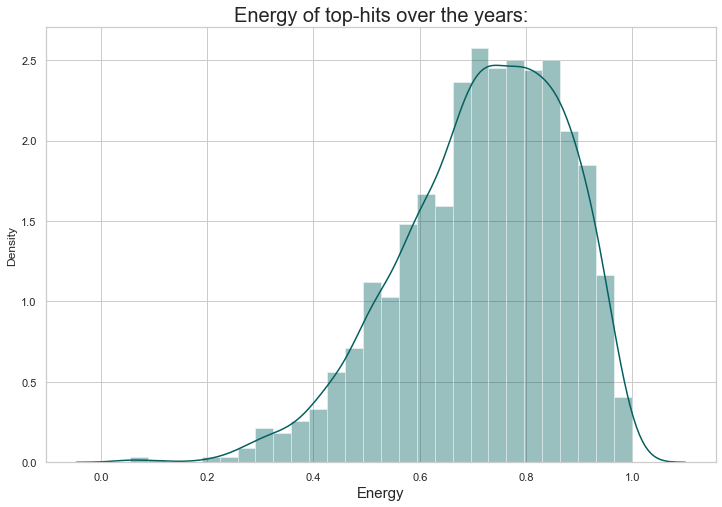

Average energy of hits: 0.7200572012257392

Maximum energy of hit:


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
477,Special D.,Come With Me - Radio Edit,185133,False,2004,61,0.739,0.999,7,-5.077,1,0.0803,0.13,0.00224,0.28,0.501,139.982,pop


In [209]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,8))
sns.distplot(df_new['energy'],color='#045F5F')
plt.xlabel('Energy',size=15)
plt.title("Energy of top-hits over the years:",size=20)
plt.show()
print('Average energy of hits:',df_new['energy'].mean())
print('\nMaximum energy of hit:')
d=data['energy'].max()
data[data['energy']==d]

###### Loudness

D:\AnaConda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


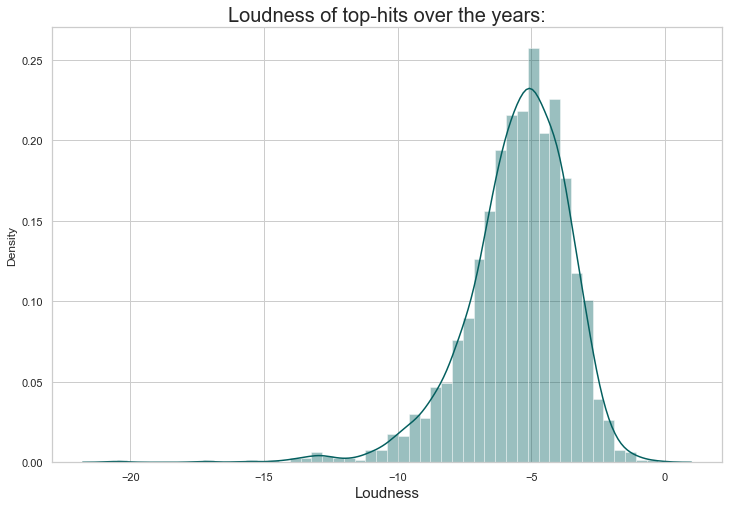

Average loudness of hits: 0.7200572012257392

Maximum loudness of hit:


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
971,La Roux,In For The Kill,248626,False,2009,59,0.629,0.969,8,-0.276,0,0.0455,0.00184,0.0,0.122,0.905,150.01,"pop, Dance/Electronic"


In [210]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,8))
sns.distplot(df_new['loudness'],color='#045F5F')
plt.xlabel('Loudness',size=15)
plt.title("Loudness of top-hits over the years:",size=20)
plt.show()
print('Average loudness of hits:',df_new['energy'].mean())
print('\nMaximum loudness of hit:')
d=data['loudness'].max()
data[data['loudness']==d]

D:\AnaConda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\AnaConda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\AnaConda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

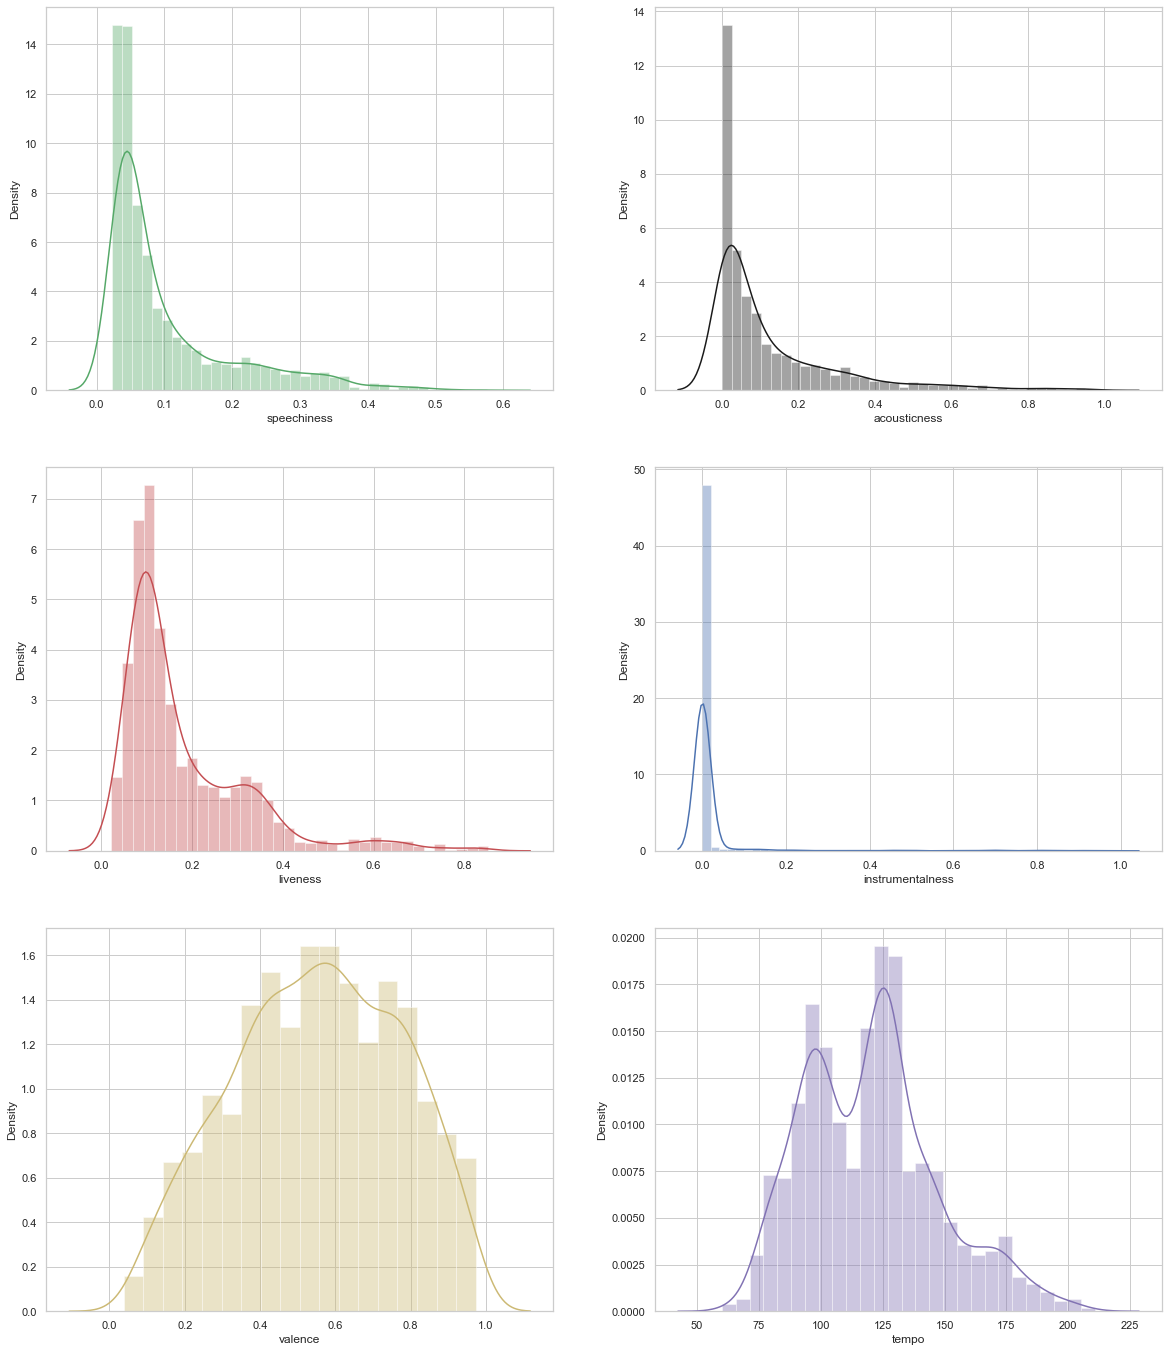

In [211]:
fig,ax=plt.subplots(3,2,figsize=(20,24))

speechiness=df_new['speechiness'].dropna()
sns.distplot(speechiness,color='g',ax=ax[0][0])

acousticness=df_new['acousticness'].dropna()
sns.distplot(acousticness,color='k',ax=ax[0][1])

liveness=df_new['liveness'].dropna()
sns.distplot(liveness,ax=ax[1][0],color='r')

instrumentalness=df_new['instrumentalness'].dropna()
sns.distplot(instrumentalness,ax=ax[1][1],color='b')

valence=df_new['valence'].dropna()
sns.distplot(valence,ax=ax[2][0],color='y')

tempo=df_new['tempo'].dropna()
sns.distplot(tempo,ax=ax[2][1],color='m')
plt.show()

In [212]:
data1={'heading':['Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo'],
       'data':[df_new['speechiness'].mean(),df_new['acousticness'].mean(),df_new['instrumentalness'].mean(),
      df_new['liveness'].mean(),df_new['valence'].mean(),df_new['tempo'].mean()]}

df2 = pd.DataFrame(data1)
df2 

,heading,data
0,Speechiness,0.104174
1,Acousticness,0.128534
2,Instrumentalness,0.015371
3,Liveness,0.181406
4,Valence,0.551287
5,Tempo,120.080067


### From the above analysis we can suggest that:

**The danceability and energy on average for the top-hits are generally high , indicating that these songs are high on intensity.***

***The loudness of the top-hits are also high compared to the rest of the songs.***

***Speechiness of top-hits are quite low.***

***Instrumentalness of songs are also low , which gives a pretty clear idea as to how music-taste has evolved among listeners.*** 

***The late 20th century was dominated by the bands as the years progressed we got to witness a decline in the number of bands being popular and thus instrumentalness also declined over the years expect few.***

***Acousticness of tracks are also low , suggesting that songs which tend to become top-hits are high in energy and tempo.***

***Songs which become top-hits score low on liveness indicating the songs are mostly recorded.***

***Top-hits on average score just above 0.5 on valence indicating that while most top-hits have a positive mood associated with them , still top-hits have quite a equal mixture of both positive and sad sounding associated with them.***

***Last but not the least the tempo for most of the top-hits on average is 120bpm suggesting that songs which are peppy and fast sounding.***

## Conclusion:
##### From the above analysis we can infer the following:
***The duration of top-hits have been decreasing with each passing year. The average song duration is 3 min and 48 sec long.***

***Songs which tend to become top-hits have low explicity*** .

***Rihanna , Emimem , Drake , Calvin Harris , David Guetta*** are the most popular artists.

Top-hits generally had

**1.high danceability levels ,***

***2.fast paced tempo***

***3.low acousticness***

***4.*** ***instrumentalness*** and were generally ***recorded.***

Songs which tend to be top-hits over this period mostly belonged to the genre ***'Pop'***. 